# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

### Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # Прочитаем файл

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.duplicated().sum() # Уточняем количество явных дубликатов в DataFrame

0

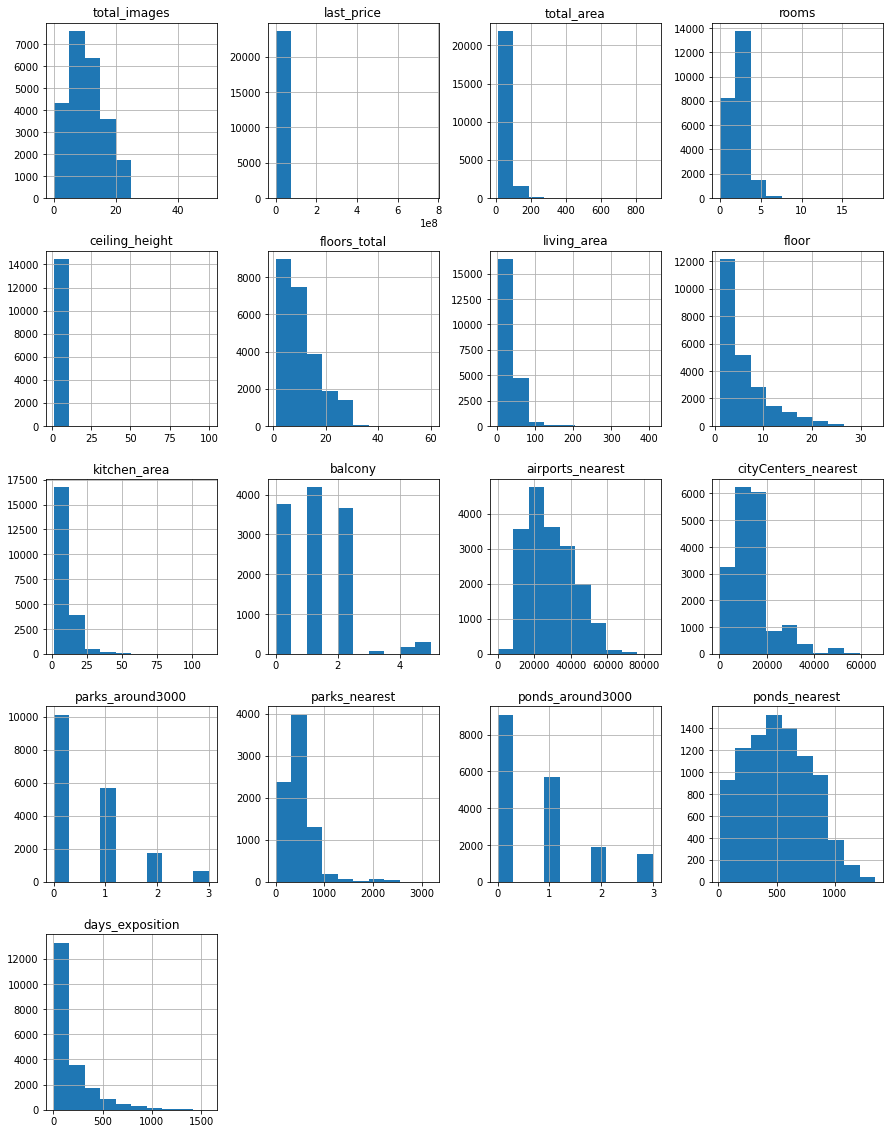

In [7]:
data.hist(figsize=(15, 20)); # Построим гистограммы

In [8]:
data.isna().sum().sort_values(ascending=False) # Узнаем и сортируем количество пропусков

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

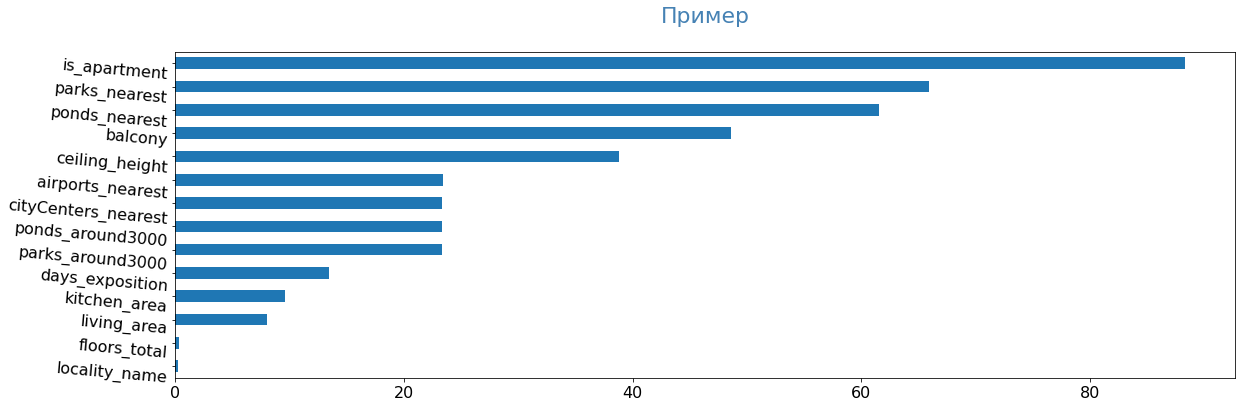

In [10]:
pass_value_barh(data)

In [11]:
 # Переименуем название столбца cityCenters_nearest
data.rename(columns= {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

В данных 23699 записи. Полностью заполнены данными столбцы total_images, last_price, total_area, rooms, floor, studio, open_plan, living_area, в данных столбцах отсутствуют пропуски данных.
В столбцах floors_total и locality_name заполнены данными более 98% строк, т.е. пропуски далее можно будет удалить в связи с малочисленностью.
В столбце balcony (балконы) пропусков - 11 519, скорее всего потому что в квартире нет балкона и пропуски можно заменить на 0.

### Выполните предобработку данных

In [12]:
data['balcony'] = data['balcony'].fillna(0).astype(int) # преобразуем столбец к целочисленному типу и заменим пропуски на 0

In [13]:
data['total_images'] = data['total_images'].astype('int64') # преобразуем столбец к целочисленному типу

In [14]:
# Заполнение NaN нулями или другим значением по умолчанию
data['last_price'] = data['last_price'].fillna(0)
# Удаление строк, где есть NaN в столбце 'last_price'
data = data.dropna(subset=['last_price'])
# Преобразование типа
data['last_price'] = data['last_price'].astype('int64')

In [15]:
# Убираем слишком дорогие квартиры стоимостью больше 100.000.000.
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

In [16]:
data['total_area'].round(2)

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23662, dtype: float64

In [17]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [18]:
 # переводим дату в формат datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# data['first_day_exposition'].unique()

In [19]:
 # Замена NaN на медианное значение в ceiling_height

data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print(data['ceiling_height'].sort_values(ascending=False).head(40))

22869    100.00
22336     32.00
3148      32.00
21377     27.50
5246      27.00
21824     27.00
4876      27.00
22938     27.00
17857     27.00
10773     27.00
5807      27.00
20478     27.00
5669      26.00
14382     25.00
6246      25.00
11285     25.00
18545     25.00
355       25.00
9379      25.00
4643      25.00
5076      24.00
20507     22.60
17496     20.00
15061     14.00
22309     10.30
5863       8.30
3474       8.00
17442      8.00
15743      8.00
21227      5.80
1388       5.60
7578       5.50
12628      5.30
464        5.20
1053       5.00
2802       4.80
19142      4.70
12401      4.65
3067       4.50
9783       4.50
Name: ceiling_height, dtype: float64


In [20]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10 # Замена явных ошибок ceiling_height - высота потолков

In [21]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  int64         
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23576 non-null  float64       
 7   living_area           21764 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          2771 non-null   object        
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21390 non-null  float64       
 13  balcony         

In [22]:
# Пропуски в столбце "ceiling_height" заменим на медианы значений высот потолков по каждому этажу
median_replace = data.groupby('floors_total')['ceiling_height'].median()


In [23]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23662 non-null  int64         
 1   last_price            23662 non-null  int64         
 2   total_area            23662 non-null  float64       
 3   first_day_exposition  23662 non-null  datetime64[ns]
 4   rooms                 23662 non-null  int64         
 5   ceiling_height        23662 non-null  float64       
 6   floors_total          23576 non-null  float64       
 7   living_area           21764 non-null  float64       
 8   floor                 23662 non-null  int64         
 9   is_apartment          2771 non-null   object        
 10  studio                23662 non-null  bool          
 11  open_plan             23662 non-null  bool          
 12  kitchen_area          21390 non-null  float64       
 13  balcony         

In [24]:
# Условие для неккоректных значений 
incorrect_floor_mask = data['floors_total'] < data['floor']

# Фильтруем строки с некорректными значениями
incorrect_floor_data = data[incorrect_floor_mask]

if incorrect_floor_data.empty:
    print("Все значения корректны: этаж квартиры не превышает общую этажность дома.")
else:
    print("Обнаружены некорректные значения: этаж квартиры превышает общую этажность дома.")
    print(incorrect_floor_data[['floor', 'floors_total']])


Все значения корректны: этаж квартиры не превышает общую этажность дома.


In [25]:
# Заполняем пропуски на False и меняем тип данных на "bool"
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype(bool)

In [26]:
# Находим зависимость столбцов друг от друга при помощи корреляции Пирсона.
print(data.corr().sort_values(by='kitchen_area', ascending=False)['kitchen_area'])

kitchen_area            1.000000
total_area              0.593501
last_price              0.592283
living_area             0.405559
ceiling_height          0.292869
rooms                   0.254772
floors_total            0.171583
ponds_around3000        0.141961
floor                   0.138463
total_images            0.100791
days_exposition         0.098731
parks_around3000        0.084930
is_apartment            0.050718
balcony                 0.049052
parks_nearest           0.031822
airports_nearest        0.009014
ponds_nearest          -0.099528
city_centers_nearest   -0.186808
studio                       NaN
open_plan                    NaN
Name: kitchen_area, dtype: float64


Явной зависимости от других столбцов нет, возможно собственники просто не указали наличие кухни 

In [27]:
# Заменим значение на 0 и округлим 
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].round(2)

0        25.00
1        11.00
2         8.30
3         0.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     0.00
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23662, dtype: float64

In [28]:
# Находим зависимость столбцов друг от друга при помощи корреляции Пирсона.
print(data.corr().sort_values(by='balcony', ascending=False)['balcony'].head())

balcony                 1.000000
floors_total            0.172963
floor                   0.168782
kitchen_area            0.093982
city_centers_nearest    0.064732
Name: balcony, dtype: float64


Явной зависимости от других столбцов нет, возможно собственники просто не указали наличие балкона

In [29]:
# Заменим значение на 0 и преобразуем к целочисленному типу
data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype(int)

In [30]:
# перевод в строчные буквы
data['locality_name'] = data['locality_name'].str.lower()

# Оставим только названия
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё','е')
    .replace(['поселок ','при железнодорожной станции ', 'платформа ', 'садоводческое некоммерческое товарищество ',
             'садовое товарищество ', 'станции ', 'село ', 'пансионат ', 'городского типа ',
             'деревня ', 'городской поселок '], '', regex=True)
)
# Уникальные значения 
print(data['locality_name'].unique())

['санкт-петербург' 'шушары' 'городской янино-1' 'парголово' 'мурино'
 'ломоносов' 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар'
 'колпино' 'красный бор' 'гатчина' 'федоровское' 'выборг' 'кронштадт'
 'кировск' 'новое девяткино' 'металлострой' 'лебяжье' 'сиверский'
 'молодцово' 'кузьмоловский' 'новая ропша' 'павловск' 'пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи'
 'аннино' 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское'
 'красное село' 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новый свет'
 'сланцы' 'путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'оржицы' 'кальтино' 'романовка' 'бугры' 'рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'павлово' 'оредеж' 'копорье' 'молодежное'
 'тихвин' 'победа' 'нурма' 'синявино' 'тосно' 'стрельна' 'бокситогорск'
 'александровская' 'лопухинка' 'пикалево' 'терволово' 'советский'
 'подпорожье' 'петровское' 'токсово' 'сельцо' 'вырица' 'кипень' 'келози'
 'вартемяги' 'т

In [31]:
# Заменим пропуски на "unknown"
data['locality_name'] = data['locality_name'].fillna('unknown')

#### check name

In [32]:
# check
data.locality_name.nunique()

315

In [33]:
# Округляем значения
data['airports_nearest'].round(2)

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23662, dtype: float64

Пропуски скорее всего говорят, что аэропорта либо нет в этом городе, либо он находится далеко.

In [34]:
# Округляем значения
data['city_centers_nearest'].round(2)

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: city_centers_nearest, Length: 23662, dtype: float64

Пропуски скорее всего, указывают,что объект продажи находится не в городе

In [35]:
# Заменим значение на 0 и преобразуем к целочисленному типу
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)

Пропуски скорее всего, указывают, что на таком расстоянии нет парков и значение можно заполнить 0

In [36]:
data['parks_nearest'].round(2)

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23662, dtype: float64

Пропуски скорее всего означают, что объект продажи находится далеко от парка, оставим значения неизменным.

In [37]:
# Заменим значение на 0 и преобразуем к целочисленному типу
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [38]:
data['ponds_nearest'].round(2)

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23662, dtype: float64

Пропуски скорее всего, указывают,что объект продажи находится далеко от водоема, оставим значения неизменным.

In [39]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5541
city_centers_nearest     5518
parks_around3000            0
parks_nearest           15609
ponds_around3000            0
ponds_nearest           14585
days_exposition          3176
dtype: int64

Вывод

В процессе предобработки данных мы:

Переименовали название столбца cityCenters_nearest на city_centers_nearest.
Заполнили явные пропуски в таблице, округлили значение до значащих величин.
Изменили тип данных, в соответствии с данными находяшимися в столбцах.

Основными причинами пропусков могли стать: 

собственники не указывают какие либо параметры

человеческий фактор 

ощибки при выгрузке или сохранении данных 

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

### Добавьте в таблицу новые столбцы

In [40]:
# Добавим столбец price_square_meter с ценой одного квадратного метра объекта
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_square_meter'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149511.4 ,
        41795.67])

In [41]:
# Добавим столбец day_publication день недели публикации объявления
data['day_publication'] = data['first_day_exposition'].dt.weekday 
data['day_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [42]:
# Добавим столбец month_publication месяц публикации объявления
data['month_publication'] = data['first_day_exposition'].dt.month 
data['month_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [43]:
# Добавим столбец year_publication год публикации объявления
data['year_publication'] = data['first_day_exposition'].dt.year 
data['year_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [44]:
# Добавим столбец type_apartment_floor тип этажа квартиры

# Определим функцию

def floor(row):
    if row['floor'] <= 0:
        return 'отсутствует'
    elif row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_apartment_floor'] = data.apply(floor, axis=1) 
data['type_apartment_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

In [45]:
# Добавим столбец distance_city_center расстояние до центра города в километрах и округлим
data['distance_city_center'] = (data['city_centers_nearest'] / 1000).round(0)
data['distance_city_center'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

In [46]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
try:
    data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('Int32')
    print('city_centers_nearest_km ok')
except:
    print('city_centers_nearest_km Int32 type conversion fail')

city_centers_nearest_km ok


### Проведите исследовательский анализ данных

Анализ общей площади

In [47]:
data['total_area'].describe()


count    23662.000000
mean        59.928048
std         33.471517
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        590.000000
Name: total_area, dtype: float64

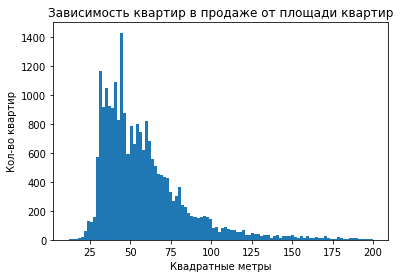

In [48]:
# Построим гистограмму и оставим значения от минимального 12 до 100 кв. метров 
plt.hist(data['total_area'], bins=100, range=(12,200))
plt.title('Зависимость квартир в продаже от площади квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
plt.show()

In [49]:
# check
data.shape

(23662, 29)

In [50]:
# check
data.shape

(23662, 29)

Вывод:

На рынке самое большое предложение квартир с общей площадью от 30 до 70 кв. метров с максимумом около 50 кв. метров.

Анализ жилой площади

In [51]:
data['living_area'].describe()

count    21764.000000
mean        34.251632
std         21.175156
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.000000
Name: living_area, dtype: float64

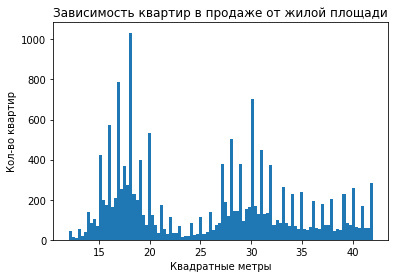

In [52]:
# Построим гистограмму и оставим значения от минимального 12 до 42 кв. метров 
plt.hist(data['living_area'], bins=100, range=(12,42))
plt.title('Зависимость квартир в продаже от жилой площади')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
plt.show()

Вывод:

Больше всего продают квартир с жилой площадью около 19 кв. м и 30 кв. м но при этом прослеживается спад предложений в средней зоне 21-24 кв. м.

Анализ площади кухни

In [53]:
data['kitchen_area'].describe()

count    23662.000000
mean         9.516587
std          6.283348
min          0.000000
25%          6.300000
50%          9.000000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

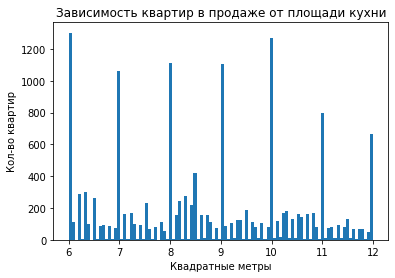

In [54]:
# Построим гистограмму и оставим значения от минимального 6 до 12 кв. метров 
plt.hist(data['kitchen_area'], bins=100, range=(6,12))
plt.title('Зависимость квартир в продаже от площади кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Кол-во квартир')
plt.show()

Вывод:

Прослеживается, что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, также заметны явные выбросы на целых числах.

Анализ цены

In [55]:
data['last_price'].describe()

count    2.366200e+04
mean     6.251508e+06
std      6.424390e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.633500e+06
75%      6.750000e+06
max      9.900000e+07
Name: last_price, dtype: float64

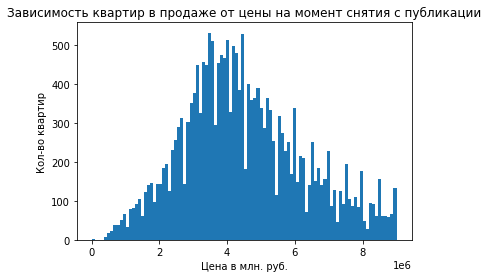

In [56]:
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,9.00000e+06))
plt.title('Зависимость квартир в продаже от цены на момент снятия с публикации')
plt.xlabel('Цена в млн. руб.')
plt.ylabel('Кол-во квартир')
plt.show()

Вывод:

Из гисторгаммы видно, что наиболее часто цена объекта составляет 3,7 - 4,3 миллниона.

Количество комнат

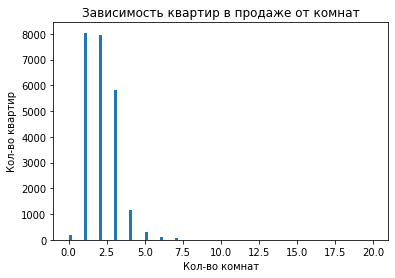

In [57]:
plt.hist(data['rooms'], bins=100, range=(0,20))
plt.title('Зависимость квартир в продаже от комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во квартир')
plt.show()

Высота потолков

In [58]:
data['ceiling_height'].describe()

count    23662.000000
mean         2.697666
std          0.250049
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

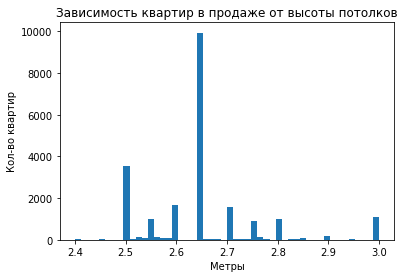

In [59]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=50, range=(2.4,3))
plt.title('Зависимость квартир в продаже от высоты потолков')
plt.xlabel('Метры')
plt.ylabel('Кол-во квартир')
plt.show()

Среди большинства предложений высота составляет 2.65 метров.

Тип этажа квартиры («первый», «последний», «другой»)

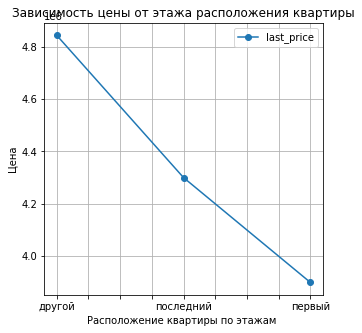

In [60]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price', aggfunc='median').sort_values(by='last_price', ascending=False)
    .plot(grid=True, style='o-', figsize=(5, 5), title='Зависимость цены от этажа расположения квартиры')
)
plt.xlabel('Расположение квартиры по этажам ')
plt.ylabel('Цена')
plt.show()

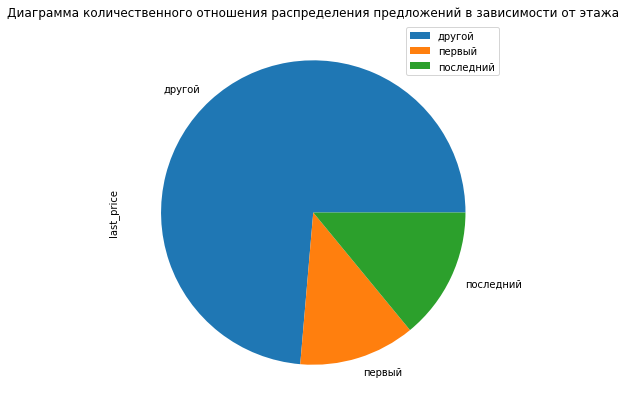

In [61]:
data.pivot_table(index='type_apartment_floor',values='last_price',aggfunc='count') \
  .plot(y='last_price', kind='pie', figsize=(10,7), title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

Вывод:

Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На круговой диаграмме видно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, значит люди не предпочитают эти этажи

Общее количество этажей в доме

In [62]:
data['floors_total'].describe()

count    23576.000000
mean        10.679801
std          6.599193
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

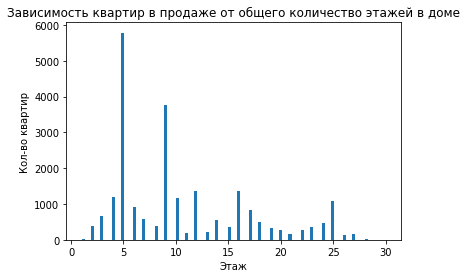

In [63]:
plt.hist(data['floors_total'], bins=100, range=(1,30))
plt.title('Зависимость квартир в продаже от общего количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Кол-во квартир')
plt.show()

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
👍

Вывод:

Больше всего предложений о продаже квартир в пятиэтажных домах.

Расстояние до центра города в метрах

In [64]:
data['city_centers_nearest'].describe()

count    18144.000000
mean     14211.021109
std       8604.994531
min        181.000000
25%       9267.000000
50%      13114.000000
75%      16296.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

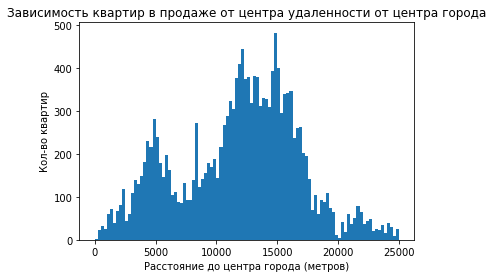

In [65]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,25000))
plt.title('Зависимость квартир в продаже от центра удаленности от центра города')
plt.xlabel('Расстояние до центра города (метров)')
plt.ylabel('Кол-во квартир')
plt.show()


Вывод:

Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров)

Расстояние до ближайшего парка

In [66]:
data['parks_nearest'].describe()

count    8053.000000
mean      491.126413
std       342.666906
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

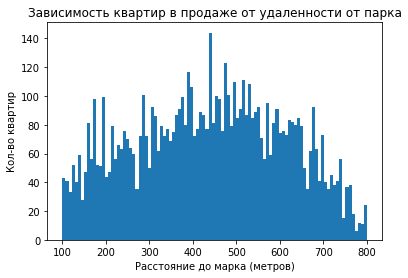

In [67]:
plt.hist(data['parks_nearest'], bins=100, range=(100,800))
plt.title('Зависимость квартир в продаже от удаленности от парка')
plt.xlabel('Расстояние до марка (метров)')
plt.ylabel('Кол-во квартир')
plt.show()

Вывод:

Количество предложений не зависит от удаленности от ближайшего парка.

Общий вывод по данному разделу:

На рынке самое большое предложение квартир с общей площадью от 30 до 70 кв. метров с максимумом около 50 кв. метров.

Больше всего продают квартир с жилой площадью около 19 кв. м и 30 кв. м но при этом прослеживается спад предложений в средней зоне 21-24 кв. м.

Прослеживается, что больше всего предложений с площадью кухни в 6 метров затем 10 и чередом 7,8,9 кв. метров, также заметны явные выбросы на целых числах.

Наиболее часто цена квартиры составляет 3,7 - 4,3 миллниона.

Больше всего предложений - однокомнатные квартиры. С увеличением комнат количество предложений снижается линейно.

Среди большинства предложений высота составляет 2.65 метров.

Менее ценными считаются квартиры на "Первом" и "Последнем" этаже. На круговой диаграмме видно, что общее количество предложений "Первого" и "Последнего" этажа составляет чуть больше 25% от общего количества предложений, значит люди не предпочитают эти этажи

Больше всего предложений о продаже квартир в пятиэтажных домах.

Больше всего предложений о продаже в спальных районах на окраинах города (на расстоянии 12000 -15000 метров)


В заключении: Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 50 кв. метра с кухней в 6 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. от центра города.

#### check gap

In [68]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23662 non-null  int64         
 1   last_price               23662 non-null  int64         
 2   total_area               23662 non-null  float64       
 3   first_day_exposition     23662 non-null  datetime64[ns]
 4   rooms                    23662 non-null  int64         
 5   ceiling_height           23662 non-null  float64       
 6   floors_total             23576 non-null  float64       
 7   living_area              21764 non-null  float64       
 8   floor                    23662 non-null  int64         
 9   is_apartment             23662 non-null  int64         
 10  studio                   23662 non-null  bool          
 11  open_plan                23662 non-null  bool          
 12  kitchen_area             23662 n

In [69]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,662.00","23,662.00","23,662.00","20,486.00","23,662.00","21,764.00","23,662.00","23,662.00","23,576.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,0.00,1.00,1.00
max,19.00,590.00,14.00,"1,580.00","99,000,000.00",409.00,107.00,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,633,500.00",30.00,9.00,4.00,9.00


In [70]:
# Также исключим значения с наименьшей ценой квартиры. Всего одна квартира с ценой 12 190 руб.
data['last_price'][data['last_price'] < 100000].count()
data.loc[data['last_price'] < 100000,'last_price'] = None
data = data.dropna(subset=['last_price'])
data['last_price'][data['last_price'] < 100000].count() # проверка 

0

In [71]:
# удалим квартиры с высотой потолка менее 2м.
print(data['ceiling_height'][data['ceiling_height'] < 2].count())
data.loc[data['ceiling_height'] < 2,'ceiling_height'] = None
data = data.dropna(subset=['ceiling_height'])
print(data['ceiling_height'][data['ceiling_height'] < 2].count()) # проверка

3
0


In [72]:
data.drop(index=data.query('total_area > 500').index,inplace=True)


In [73]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

In [74]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)

In [75]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)

Жилая площадь меньше 10 кв.м.:  25
Жилая площадь больше общей:  0
Жилая площадь больше 200:  16


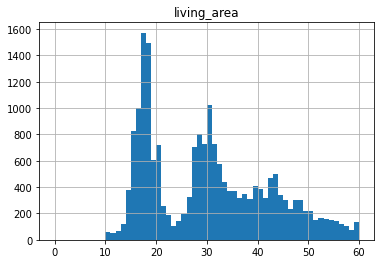

In [76]:
print('Жилая площадь меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Жилая площадь больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Жилая площадь больше 200: ',data.query('living_area > 200')['living_area'].count())

data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

data.hist('living_area', bins=60, range=(0,60));

Этаж 0 0
Этаж 0 0
Этаж больше количества этажей:  0


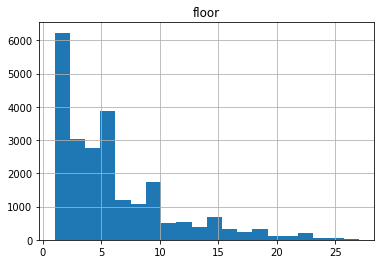

In [77]:
print('Этаж 0',data.query('floor == 0')['floor'].count())

print('Этаж 0',data.query('floor > 30')['floor'].count())

print('Этаж больше количества этажей: ',data.query('floor > floors_total')['floor'].count())

data.hist('floor',bins=20);

#### check

In [78]:
# check
data.shape

(23462, 29)

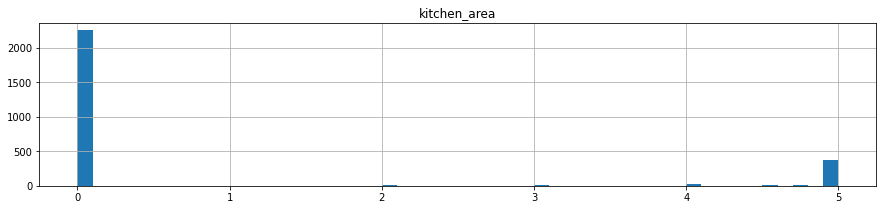

In [79]:
# check
data.hist(column = 'kitchen_area', bins = 50, figsize = (15,3), range = (0,5));

In [80]:
# check
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['total_area'].count())

Площадь кухни меньше 2 кв.м.:  2251


Площадь кухни меньше 2 кв.м.:  802
Площадь кухни 5 кв.м.:  352
Площадь кухни больше 50 кв.м.:  33
Площадь кухни больше общей:  0


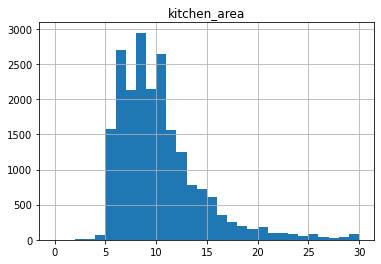

In [81]:
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

data.hist('kitchen_area', bins=30, range=(0,30));

In [82]:
# check
data.shape

(21177, 29)

Объявление не было оопубликовано:  0
Объявлению больше 3 лет :  156


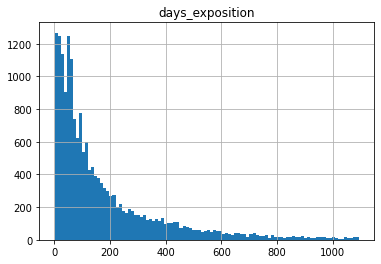

In [83]:
print('Объявление не было оопубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())

print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

data.hist('days_exposition', bins=100);

In [84]:
data.reset_index(drop=True,inplace=True)

In [85]:
# check
 
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,021.00","21,021.00","21,021.00","18,085.00","21,021.00","20,591.00","21,021.00","21,021.00","20,982.00"
min,1.00,14.00,2.50,1.00,"430,000.00",10.00,2.00,1.00,1.00
max,14.00,441.98,4.00,"1,095.00","95,000,000.00",200.00,50.00,27.00,29.00


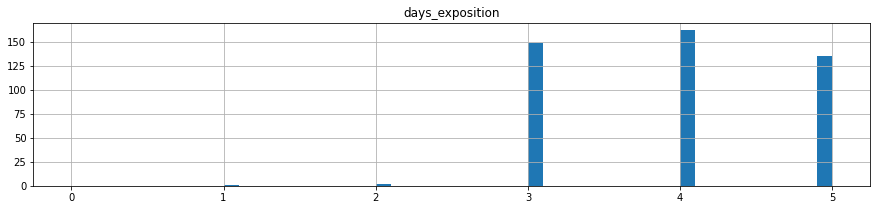

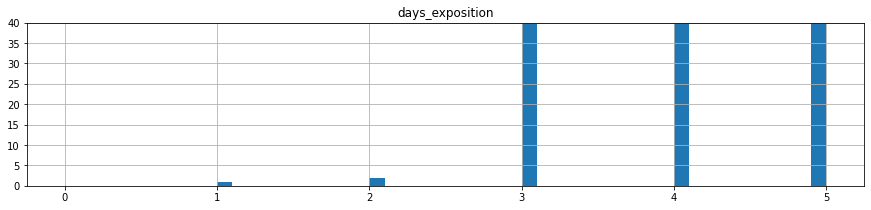

In [86]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Доп. задание, на твое усмотрение — сможешь добавить в таблицу расчет медианного значения?
        
        (
            data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
                  'floor', 'floors_total']]
            .apply (['count', 'min', 'max'])   
            .style.format("{:,.2f}")
        )

In [87]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [88]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


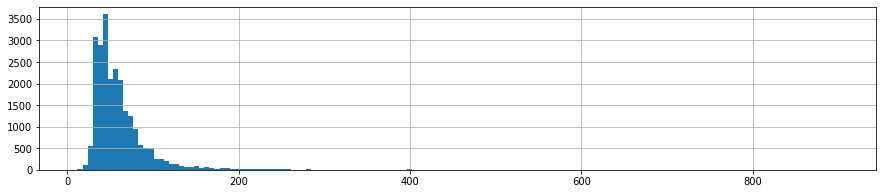

In [89]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

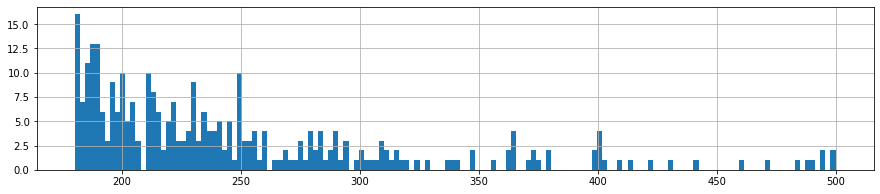

In [90]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

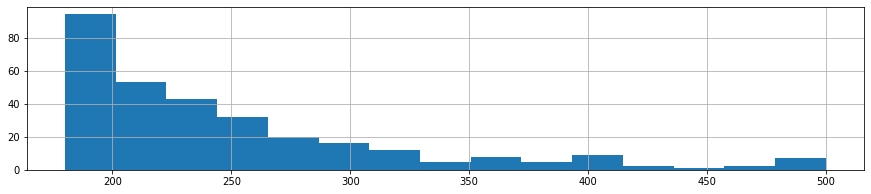

In [91]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

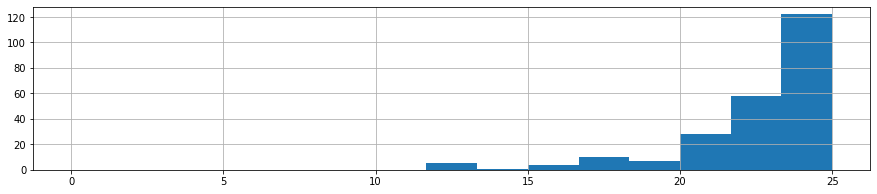

In [92]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [93]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,23.57,2.50,3.00,"600,000.00",10.40,3.80,1.00,2.00
0.01,1.00,29.00,2.50,4.00,"1,050,000.00",13.45,5.00,1.00,2.00
0.5,2.00,52.00,2.65,99.00,"4,680,000.00",30.00,9.01,4.00,9.00
0.99,5.00,179.00,3.50,938.16,"30,000,000.00",108.08,32.00,22.00,26.00
0.9988,7.00,286.72,4.00,"1,078.30","67,776,000.00",171.88,45.00,26.00,27.00


Изучаем, как быстро продавались квартиры

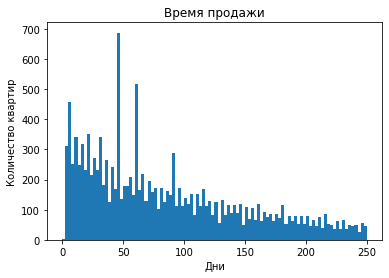

count    18085.000000
mean       175.957313
std        199.681563
min          1.000000
25%         44.000000
50%         99.000000
75%        232.000000
max       1095.000000
Name: days_exposition, dtype: float64

In [94]:
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()

Вывод по времение продажи квартир

Среднее значение продажи составляет 180 дней, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбрасов и нестандартных значений.

В среднем продажа среднестатистичекой квартиры занимает 2-3 месяца в зависимотсти от сопутствующих факторов(площади, цены, удалённости от центра).

In [95]:
# Функция для подсчёта границ с учетом 1.5 размаха
# def quartile_range(df, column):
#    q1 = df[column].quantile(0.25)
#    iqr = q3 - q1
#    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
#    return dfq
# Столбцы с выбросами
# list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
# for col in list_features:
#    data[col] = quartile_range(data, col)

#### check

In [96]:
# check
 
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,021.00","21,021.00","21,021.00","18,085.00","21,021.00","20,591.00","21,021.00","21,021.00","20,982.00"
min,1.00,14.00,2.50,1.00,"430,000.00",10.00,2.00,1.00,1.00
max,14.00,441.98,4.00,"1,095.00","95,000,000.00",200.00,50.00,27.00,29.00


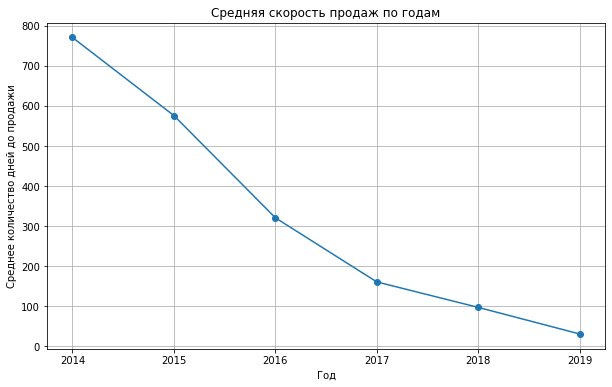

In [97]:
# Рассчет средней скорости продаж по годам
avg_days_per_year = data.groupby('year_publication')['days_exposition'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(avg_days_per_year.index, avg_days_per_year.values, marker='o', linestyle='-')
plt.title('Средняя скорость продаж по годам')
plt.xlabel('Год')
plt.ylabel('Среднее количество дней до продажи')
plt.grid(True)
plt.show()

Среднее время продажи квартиры в днях: 175
Медианное время продажи квартиры в днях: 99


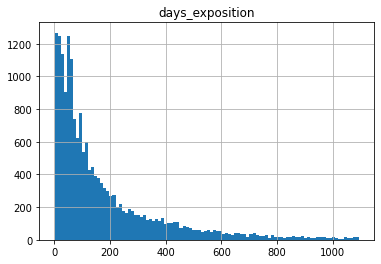

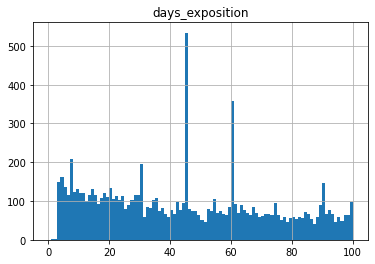

In [98]:
data.hist('days_exposition', bins=100);
data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

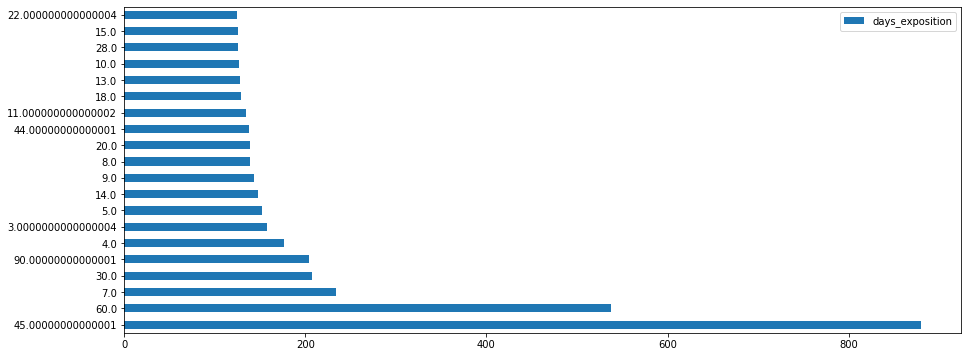

In [99]:
# check
# Моды на сырых данных
 
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [100]:
print(data.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr().round(2), '\n')

              kitchen_area  last_price  living_area  rooms  total_area
kitchen_area          1.00        0.49        -0.47  -0.63        0.16
last_price            0.49        1.00         0.40   0.23        0.83
living_area          -0.47        0.40         1.00   0.96        0.77
rooms                -0.63        0.23         0.96   1.00        0.64
total_area            0.16        0.83         0.77   0.64        1.00 



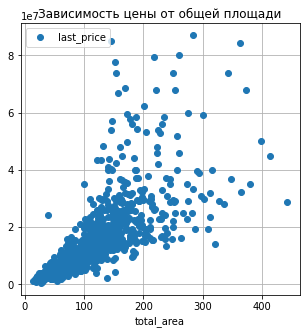

In [101]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от общей площади')
plt.show()

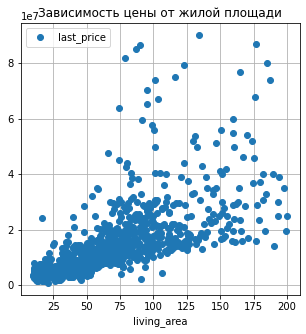

In [102]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от жилой площади')
plt.show()

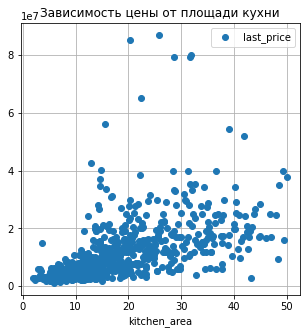

In [103]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от площади кухни')
plt.show()

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит перерисовать первые три графика без применения сводных таблиц
        
Можно попробовать настроить вид точечных графиков      
    
[Как сделать диаграмму рассеяния из фрейма данных Pandas](https://www.codecamp.ru/blog/pandas-scatter-plot/?ysclid=lh0tbpkoa9628147030)
    
Примеры расчета коэф. корреляции и не только
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?ysclid=l9ev0utyg728177057)        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Почему мы не применяем группировку данных для диаграмм рассеяния.
        
Дело в качестве графика. Если мы сводим данные в таблицу — точечный график не покажет всех нюансов в данных, например выбросы - отдельные точки, или отдельные облака
        
Пример из датасета про цветы - Ирисы ⬇⬇, три класса Ирисов отличаются по ширине и длине околоцветника, что прекрасно можно наблюдать на точечной диаграмме. Если мы построим сводную таблицу и усредним значения, мы этого разделения не увидим
        
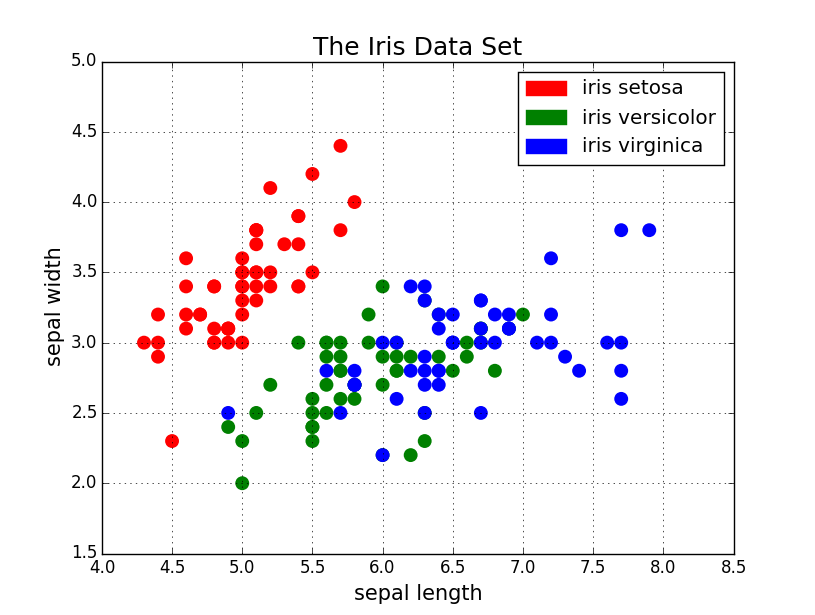        

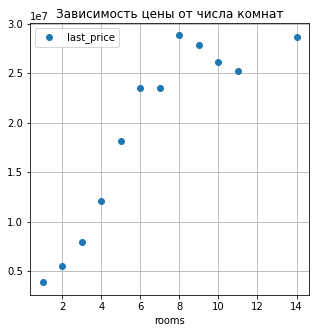

In [104]:
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Зависимость цены от числа комнат')
plt.show()

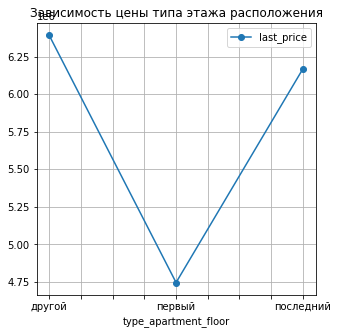

In [105]:
(
    data.pivot_table(index='type_apartment_floor', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены типа этажа расположения')
plt.show()

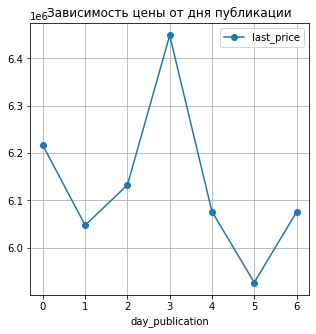

In [106]:
(
    data.pivot_table(index='day_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от дня публикации')
plt.show()

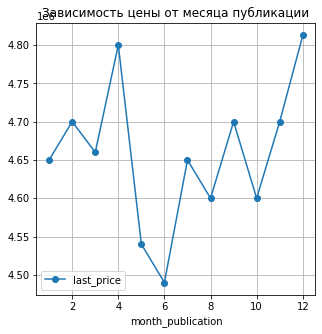

In [107]:
(
    data.pivot_table(index='month_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от месяца публикации')
plt.show()

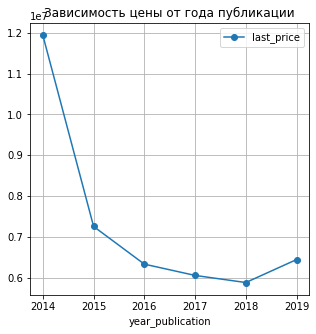

In [108]:
(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость цены от года публикации')
plt.show()

In [109]:
 data.pivot_table(index='year_publication', values='total_area', aggfunc='mean')

,total_area
year_publication,
2014,84.844141
2015,67.656257
2016,61.790063
2017,59.795551
2018,57.888932
2019,58.424367


In [110]:
 data.pivot_table(index='year_publication', values='total_area', aggfunc='count')

,total_area
year_publication,
2014,99
2015,951
2016,2536
2017,7388
2018,7400
2019,2647


Вывод:

Чтобы объяснить причину — почему вместо роста средней цены на нашем графике мы наблюдаем снижение с 2014 года, и только в 2019 году небольшое повышение цен, когда реальный рынок растет из года в год, мы сгруппировали две таблицы: Снижение среднего значения квадратных метров квартир, как видно из предоставленных данных, сопровождается увеличением количества сделок с недвижимостью, также по данным видно, что количество сделок с недвижимостью значительно увеличилось с 2014 по 2018 год, а затем снизилось в 2019 году

 Прослеживается почти прямая зависимость между:

ценой и общей площадью

ценой и количеством комнат

Слабая зависимость между:

ценой и днем публикации

ценой и площадью кухни

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Про остальные значения можно сказать: Прямой зависимости нет.

#### check

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [111]:
price_sm = data.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
price_sm.columns = ['count']
price_sm = price_sm.sort_values(by='count', ascending=False).head(10)
price_sm['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter').round(2)
price_sm.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
санкт-петербург,14025,112553.13
пушкин,327,103009.39
кудрово,386,95309.74
парголово,287,90645.79
мурино,478,85681.77
шушары,396,78535.29
колпино,320,75222.11
всеволожск,353,69073.93
гатчина,294,68692.93


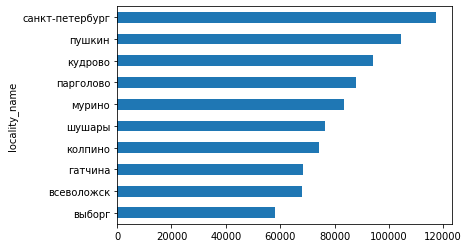

In [112]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
top_10['price_per_sq_m'].plot(kind='barh');

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра

In [113]:
data.query('locality_name == "санкт-петербург"')['distance_city_center'].describe()

count    13982.000000
mean        11.631169
std          4.772358
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: distance_city_center, dtype: float64

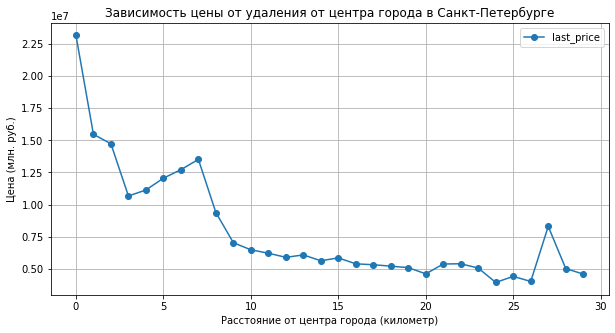

Таблица средней стоимости квартир в зависимости от удаления центра города Санкт-Петербург


,last_price
distance_city_center,
0.0,2.315279e+07
1.0,1.546173e+07
2.0,1.472426e+07
3.0,1.066674e+07
4.0,1.113105e+07
5.0,1.204898e+07
6.0,1.271067e+07
7.0,1.351009e+07
8.0,9.379938e+06


In [114]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_city_center', values='last_price')
    .plot(grid=True, style='o-', 
       
# закомментировал часть твоего кода          
#           xlim=(0,15), 
          
          figsize=(10, 5))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()
print('Таблица средней стоимости квартир в зависимости от удаления центра города Санкт-Петербург')
data.query('locality_name == "санкт-петербург" and distance_city_center < 10').pivot_table(values='last_price', index='distance_city_center')

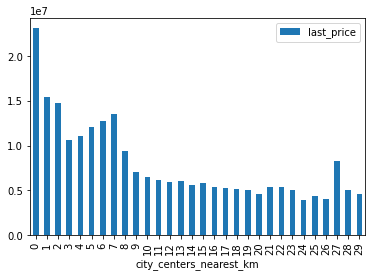

In [115]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
);

Вывод:

С большим отрывом лидирует недвижимость до 1км.

Видим более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно.

Далее цена спадает на расстоянии от 8 км. до 27 км.

Видим пик на 27км, его сложно объяснить, возможно это недвижимость в "особом" районе.

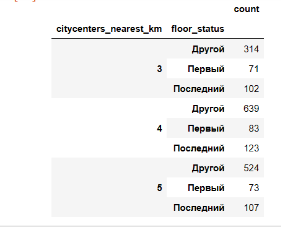

In [116]:
# Создаем сводную таблицу для подсчета количества питерских квартир по годам
petersburg_apartments_count = data[data['locality_name'] == 'санкт-петербург'].pivot_table(
    index='type_apartment_floor', 
    values='last_price', 
    aggfunc='count'
)



petersburg_apartments_count


,last_price
type_apartment_floor,
другой,10906
первый,1418
последний,1701


Большинство квартир находятся не на первом и не на последнем этажах, что подтверждает типичное распределение этажности в домах. Количество квартир на других этажах превышает количество квартир на первом или последнем этажах, это говорит о том, что большинство покупателей предпочитают квартиры на промежуточных этажах. Количество квартир, расположенных на первом этаже, значительно меньше, чем на других этажах, думаю это связано с такими недостатками, как повышенный шум и менее безопасное расположение. Количество квартир на последнем этаже также меньше, чем на других этажах, хотя это количество чуть больше, чем количество квартир на первом этаже. 


In [117]:
# check
data[data['locality_name'] == 'санкт-петербург'].pivot_table(
    index=['distance_city_center', 'type_apartment_floor'],
    values='last_price', 
    aggfunc='count'
)[9:18]

last_price
distance_city_center type_apartment_floor            
3.0                  другой                       188
                     первый                        48
                     последний                     74
4.0                  другой                       435
                     первый                        67
                     последний                     97
5.0                  другой                       603
                     первый                        70
                     последний                    121

In [118]:
# Создаем сводную таблицу с фильтрацией по Санкт-Петербургу
filtered_data = data[data['locality_name'] == 'санкт-петербург'].pivot_table(
    index='distance_city_center', 
    values='last_price', 
    aggfunc='count'
)

# Фильтрация данных только для расстояния от центра больше или равно 27 км
filtered_data = filtered_data[filtered_data.index == 27]


filtered_data


,last_price
distance_city_center,
27.0,2


По данным видно, что всего две квартиры находятся на расстоянии от центра 27 км. Это крайне маленькое количество наблюдений, в сравнении с другими.

### Напишите общий вывод

В процессе исследования объявлений о продаже квартир были выполнены следующие этапы и сделаны выводы:

Изучили общую информацию о данных

В данных 23699 записи. Для целого ряда столбцов, есть пропущенные значения и некорректный тип данных. По гисторгаммам видно, что в данных есть аномальные значения. Явные дубликаты отсутствуют. Данные признаны полными и достаточными для исследования.
Выполнена предобработка данных

Переименовали название столбца cityCenters_nearest на city_centers_nearest.

Заполнили явные пропуски в таблице, округлили значение до значащих величин.

Изменили тип данных, в соответствии с данными находящимися в столбцах.

Сделали вывод о причинах появления пропусков:

Человеческий фактор.

Несовершенство программной оболочки (не все поля обязательные, нет чекбоксов с выбором, нет проверки данных).

Возможны ошибки при выгрузке и сохранении данных.

Доработка системы во время её работы:

Добавлены новые столбцы в таблицу для проведения следующего этапа
price_sm - цена квадратного метра объекта с точностью до двух знаков после запятой.
day_publication - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
month_publication - месяц публикации объявления.
year_publication - год публикации объявления.
type_apartment_floor - тип этажа квартиры (значения — «первый», «последний», «другой»).
distance_city_center - расстояние до центра города в целых километрах.

Изучены и описаны параметры:

Среднестатистическое предложение, это квартира в пятиэтажном доме средней площадью 50 кв. метра с кухней в 6 кв. метров, высотой потолков 2,65 метра, скорее всего однокомнатная или двухкомнатная с маленькими комнатками, на удалении 13 км. от центра города.

Изучено, как быстро продавались квартиры:

Среднее значение продажи составляет 180 дня, при этом медианное значение составляет 95 дня, оно более точно характеризует среднее время продажи, так как не зависит от выбросов и нестандартных значений.
В среднем продажа средне статистической квартиры занимает 2-3 месяца

Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта:

Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров высокая.
Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, а пмоЗатем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают.

Чтобы объяснить причину — почему вместо роста средней цены на нашем графике мы наблюдаем снижение с 2014 года, и только в 2019 году небольшое повышение цен, когда реальный рынок растет из года в год, мы сгруппировали две таблицы: Снижение среднего значения квадратных метров квартир, как видно из предоставленных данных, сопровождается увеличением количества сделок с недвижимостью, также по данным видно, что количество сделок с недвижимостью значительно увеличилось с 2014 по 2018 год, а затем снизилось в 2019 году

Факторы, влияющие на стоимость

Большинство квартир находятся не на первом и не на последнем этажах, что подтверждает типичное распределение этажности в домах. Количество квартир на других этажах превышает количество квартир на первом или последнем этажах, это говорит о том, что большинство покупателей предпочитают квартиры на промежуточных этажах. Количество квартир, расположенных на первом этаже, значительно меньше, чем на других этажах, думаю это связано с такими недостатками, как повышенный шум и менее безопасное расположение. Количество квартир на последнем этаже также меньше, чем на других этажах, хотя это количество чуть больше, чем количество квартир на первом этаже. 

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
Стоимость квадратного метра в топ-10 населённых пунктов

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141
Факторы, влияющие на стоимость в центре Санкт-Петербурга

В центре города практически нет разницы, насколько квартира удалена от условного центра города.
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры

### Бонус

In [119]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

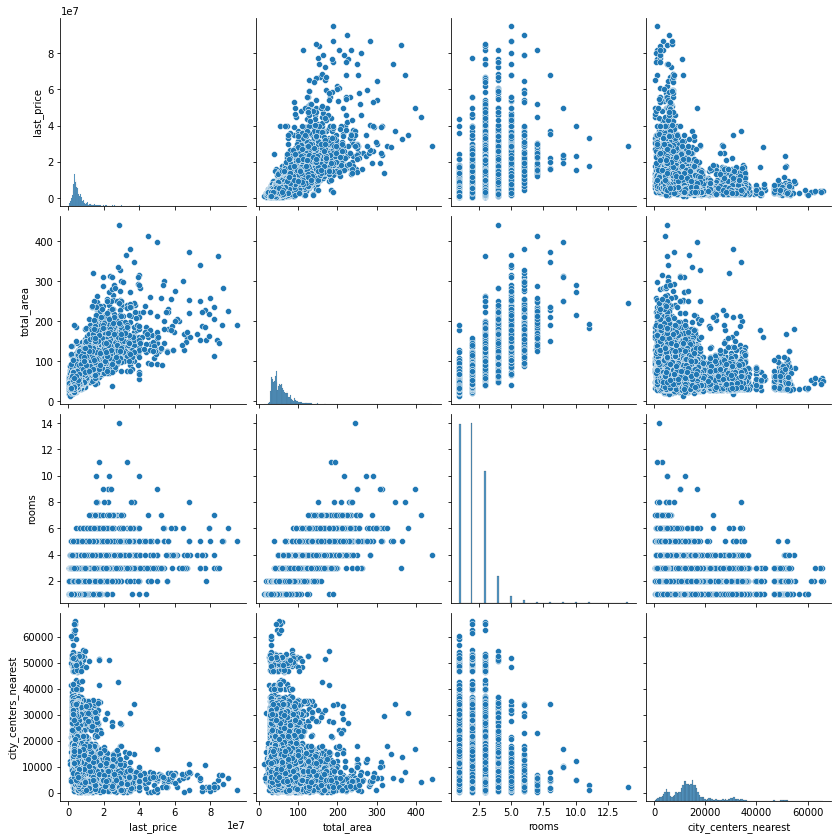

In [120]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


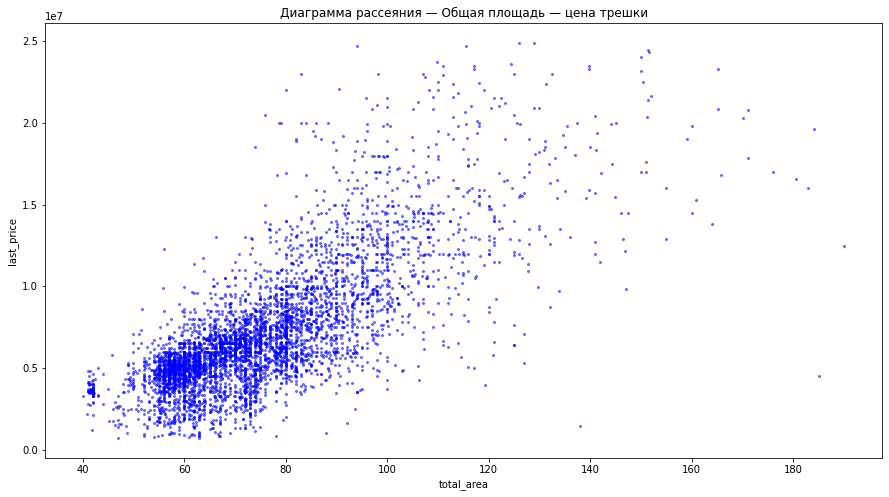

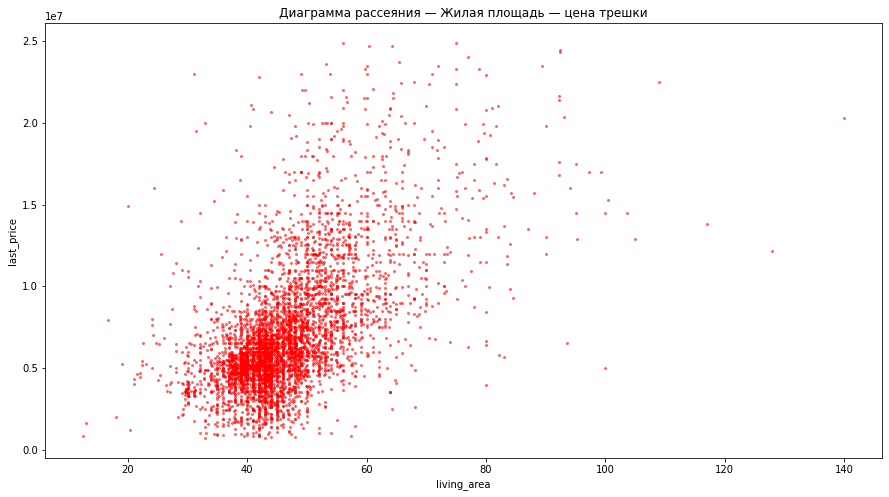

In [121]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

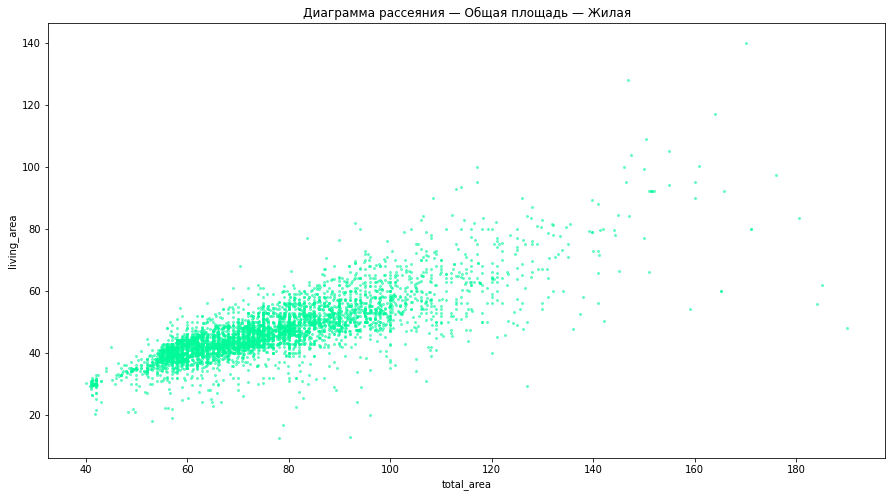

In [122]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'MediumSpringGreen', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [123]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['last_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')
# стайл и плот вместе не работают

,count,mean
locality_name,,
санкт-петербург,"14,025","7,441,557"
пушкин,327,"6,277,486"
кудрово,386,"4,565,634"
парголово,287,"4,511,029"
шушары,396,"4,127,695"
колпино,320,"3,964,815"
мурино,478,"3,845,278"
всеволожск,353,"3,827,051"
гатчина,294,"3,501,801"


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.